# 1. Consumer Choice Models

## 1.1 Choice Model based on perception of risks

Consumer behaviors are related to their individual perception of risks.
For one consumer, his/her choice is based on the maximization of utility conditional on their acceptance of risks.

$$ \max_x u(x \mid r) $$
$$ u(x)=\left\{
\begin{aligned}
cx \\
ce^x \\
c\sqrt{x}
\end{aligned}
\right.
, x \ge 0$$

Some other complex functions which indicate consumers' changing perception of risks are also used.

## 1.2 Choice Model involving discounting effects on time

Today's choice is more decisional to consumers than that of 365 days later. Here we denote $\delta$ as a discounting effect relative to time.

$$ \max_{x_t} \sum_t {u_t}({x_t})\delta(t) $$

The usually used discounting effects have exponential form and quadratic form.

## 1.3 Random Choice Model

Here we add a stochastic variable $\epsilon$ to the consumer's estimations of prices. v denotes the good's perceived value. p denoted the good's actual price.

For the goods 1,2,...,n, we have consumer's specific perception of value as

$$ \begin{array}{cccc}
1 & 2 & ... & n \\
v_1+\epsilon_1 & v_2+\epsilon_2 & ... & v_n+\epsilon_n 
\end{array} $$

The simplest purchase probability hence is

$$ Pr(p_i \le v_i+\epsilon_i) $$

# 2. Extreme Value Distribution

**Extreme value distributions** arise as limiting distributions for maximums or minimums (extreme values) of a sample of independent, identically distributed random variables, as the sample size increases. These distributions are important to discuss here before developing our discrete choice models.

Here we are interested in the standard distribution for maximums, because we are interested in the maximized utility.

## The Standard Distribution for Maximums
### The distribution function

$$ G(v) = e^{-e^{-v}} , v \in \mathbb{R}$$

This is the **type 1 extreme value distribution for maximums**. It is also known as the **Gumbel distribution**. This distribution arises as the limit of the maximum of n independent random variables, each with the standard exponential distribution.  

In [24]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
x = Symbol('x')

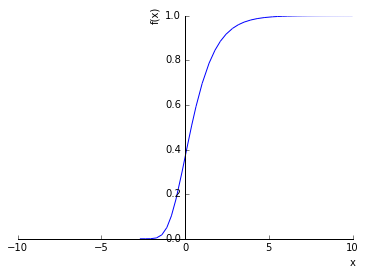

In [82]:
x = symbols("x")
G = exp(-exp(-x))
plot(G, (x, -10, 10))

### The density function
$$ g(v)= e^{-v}e^{-e^{-v}} , v \in \mathbb{R}$$

We can see the graph below and see that the distribution is unimodal and skewed right.

a. $g$ is increasing on $(-\infty,0)$ and decreasing on $(0,\infty)$. The mode occurs at 0.

b. $g$ is concave upward on $(-\infty,-c)$ and on $(c,\infty)$, and concave downward on $(-c,c)$, where $c=ln(\frac{3+\sqrt 5}{2})$

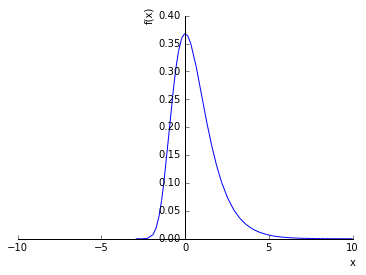

In [11]:
g = diff(G)
plot(g, (x, -10, 10))

In [14]:
result = diff(G,x,3)
solve(result)

[zoo, log(-sqrt(5)/2 + 3/2), log(sqrt(5)/2 + 3/2)]

### The quantile function

$$ G^{-1}(p)=-ln(-ln(p)), p \in (0,1)$$

In [92]:
print float(-ln(ln(4)))
print float(-ln(ln(2)))
print float(-ln(ln(4)-ln(3)))

-0.326634259978
0.366512920582
1.24589932371


We want to find the quantile function for G.

In [100]:
from scipy.interpolate import interp1d
x_array = np.linspace(-10, 10, num=2000, endpoint=True)

G_discrete = []
for i in x_array:
    G_discrete.append(G.subs(x, i))

x_new = np.linspace(0, 1, num=2000, endpoint=True)
G_inv = interp1d( G_discrete, x_array )

Note that here G_inv is the interpolated quantile function of G. We therefore show the first, median, third quantile as below.

In [107]:
print G_inv(0.25)
print G_inv(0.5)
print G_inv(0.75)

-0.326636707228771
0.366514701587483
1.24590028408479


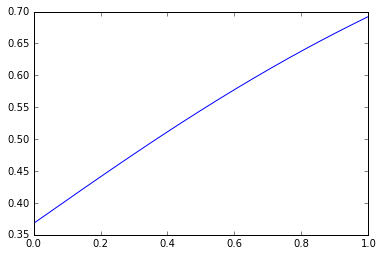

In [109]:
Ginv_discrete = []
for i in x_new:
    Ginv_discrete.append(G.subs(x, i))

plt.plot(x_new,Ginv_discrete)

### Moments

Suppose V has the extreme value distribution for maximums. The moment generating function is given by

$$ m(t)= \mathbb{E}(e^{tV}) = \Gamma (1-t), t<1 $$

Compute the mean and variance.

$$ \gamma = - \Gamma '(1) = -\int_0^{\infty}e^{-x}ln(x)dx \approx 0.57721656649 $$

$$ var(V) = \pi^2/6 $$

## The general extreme value distribution

More generally, we can form the location-scale family associated with these standard distributions. If $a \in \mathbb{R}$ and $b > 0$, then

$ X = a + bV$ has the **extreme value distribution for maximums** with **location parameter** a and **scale parameter** b.

It has distribution function

$$ F(x) = e^{ -e^{- \frac{x-a}{b}}}, x \in \mathbb{R} $$

And density function

$$ f(x) = \frac{1}{b}e^{-\frac{x-a}{b}}e^{ -e^{- \frac{x-a}{b}}}, x \in \mathbb{R} $$

Using the standardied variable $s = (x-a)/b $, we have the cdf for the general extreme value distribution (GEV):

$$ F(s;\xi)=\left\{
\begin{aligned}
exp(-(1+\xi s)^{-1/\xi}), \xi \ne 0\\
exp(-exp(-s), \xi = 0\\
\end{aligned}
\right.
$$

The sub-families defined by $\xi = 0$, $\xi > 0$ and $\xi < 0$ correspond to the Gumbel, Frechet and Weibull families.

# 3. Discrete Choice Models

## 3.1 The conditional Logit Model

The Extreme Value Type I distribution has two good features:

* The difference between two EV Type I random variables is a logit.

Can be demonstrated by assuming $u = \epsilon_2 - \epsilon_1 $ and $\epsilon_1 = v$ and calculate $u$'s marginal density, which coincides with the density of the logistic distribution. 

* EV Type Is are closed under maximization (assuming independence).

$$ Pr(\max_i \left\{ \epsilon_i \right\} \le \epsilon) = \prod_{i=1}^n Pr(\epsilon_i \le \epsilon) $$
$$ = \prod_{i=1}^n exp(-exp(-(\epsilon + \alpha_i))) $$
$$ = exp(-(\sum_{i=1}^n exp(-(\epsilon + \alpha_i))))$$
$$ = exp(-(exp(-\epsilon))\sum_{i=1}^n exp(-\alpha_i))$$

Solve for $\alpha$ in:

$$ \sum_{i=1}^n exp(-\alpha_i) = exp(-\alpha) $$

And we can get:

$$ -\alpha = log(\sum_{i=1}^n exp(-\alpha_i))$$

Substitute this $\alpha$ we can get:

$$ Pr(\max_i \left\{ \epsilon_i \right\}) = exp(-(exp(-\epsilon))exp(-\alpha)) $$
$$ = exp(-exp(-(\epsilon + \alpha)))$$

And this is an EV Type I distribution.

**Random Utility Model**

Corresponding to our assumption in 1.3, we now discuss the random utility model. If product $k$ is chosen, the probability can be calculated as below:

$$P_k = Pr(\epsilon_k - \epsilon_z \ge \Delta_z, \epsilon_k - \epsilon_j \ge \Delta_j, \forall j)$$

$\Delta_z$ and $\Delta_j$ is given, $\forall j$.

We assume all $\epsilon_j$ and $\epsilon_z$ follow $EV(0,\mu)$.

$$P_k = Pr(\epsilon_k - \epsilon_z \ge \Delta_z, \epsilon_k - \epsilon_j \ge \Delta_j, \forall j)$$
$$= \int_{\epsilon_k} F_z(\epsilon_z - \Delta_z) \prod_{j \ne k} F_j(\epsilon_k - \Delta_j) d F_k(\epsilon_k)$$

$$= \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k-\Delta_z}{\mu})-\sum_{j \ne k} exp(-\frac{\epsilon_k-\Delta_j}{\mu})]dF_k(\epsilon_k) $$

$$= \int_{\epsilon_k} exp\left\{-exp(-\frac{\epsilon_k}{\mu})[exp(\frac{\Delta z}{\mu} + \sum_{j \ne k} exp(\frac{\Delta_j}{\mu})]\right\}dF_k(\epsilon_k) $$

Let $exp(\frac{\alpha_k}{\mu})=exp(\frac{\Delta_z}{\mu})+\sum_{j \ne k} exp(\frac{\Delta_j}{\mu})$

Thus, it follows that

$$ \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k-\alpha_k}{\mu})]dF_k(\epsilon_k) $$

$$ = \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k-\alpha_k}{\mu})]exp(-\frac{\epsilon_k}{\mu})exp(-exp(-\frac{\epsilon_k}{\mu}))\frac{1}{\mu}d\epsilon_k$$

$$ = \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k-\alpha_k}{\mu})-exp(-\frac{\epsilon_k}{\mu})]exp(-\frac{\epsilon_k}{\mu})\frac{1}{\mu}d\epsilon_k$$

$$ = \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k}{\mu})[exp(\frac{\alpha_k}{\mu})+1])exp(-\frac{\epsilon_k}{\mu})\frac{1}{\mu}d\epsilon_k$$

Let $exp(\frac{\alpha_k}{\mu})+1$ be $exp(\frac{\alpha_k'}{\mu})$, therefore

$$ = \int_{\epsilon_k} exp[-exp(-\frac{\epsilon_k-\alpha_k'}{\mu})]exp[-\frac{(\epsilon_k-\alpha_k')}{\mu}]\frac{1}{\mu}d\epsilon_k exp(-\frac{\alpha_k'}{\mu}) $$

$$ = \frac{1}{exp(\frac{\alpha_k'}{\mu})}$$

$$ = \frac{1}{exp(\frac{\Delta_z}{\mu})+\sum_{j \ne k} exp(\frac{\Delta_j}{\mu})}$$

A restrictive property of the conditional (conditional on a certain choice set) logit model is that we have assumed the independence of the $\epsilon_i$, when in fact they may be correlated. This can be illustrated by the famous red bus problem. Consider the choice set {car, bus} and {car, red bus, blue bus}. By the derivation of the probability we can see that adding more kinds of buses can decrease the probability that car travel is chosen.

## 3.2 The Nested Logit



# 4. Nair's Paper Reading

## 4.1 Basic object and constraint functions

$$ \max_{x_1,x_2,...,x_J} u=u^*(\sum_{j=1}^J \psi_j x_j,z) $$
s.t.
$$ \sum_{j=1}^J \psi_j x_j + z = y $$


## 4.2 KKT condition

We want to solve for the x that maximizes the object function. The KKT conditions for the utility to be optimal are as follows:

* Stationary
* Primal Feasible (PF)
* Dual Feasible (DF)
* Complementary Slackness (CS)

This generates:

If $j = k$, $x_k^* > 0$ then $ \mu_k = 0$ and $u_1(\sum_{j=1}^J \psi_j x_j,z)\psi_k = \lambda p_k$

If $j \ne k$, $\mu_j \ge 0$ then $u_1(\sum_{j=1}^J \psi_j x_j,z)\psi_k \le \lambda p_k$

If the consumer choose k, $\frac{\psi_k}{p_k} = \frac{\lambda}{u_1(\sum_{j=1}^J \psi_j x_j,z)} \ge \frac{\psi_j}{p_j}, \forall j$.